## Sympy and Widgets

Sympy is a google project to build a module for symbolic mathematics (think Mathematica, Maple, Maxima etc.). It supports

* Basic arithmetic: *, /, +, -, **
* Simplification
* Expansion
* Functions: trigonometric, hyperbolic, exponential, roots, logarithms, absolute value, spherical harmonics, factorials and gamma functions, zeta functions, polynomials, hypergeometric, special functions, ...
* Substitution
* Arbitrary precision integers, rationals and floats
* Noncommutative symbols
* Pattern matching

and it has modules for dealing with calculus, polynomials, discrete math, equation solving, geometry, combinartorics and much more. While not strictly a numerical package, it is increasingly used in other modules to provide the mathematical thinking behind generating _efficent_ instructions for numerical packages like numpy.

In the notebook we have access to great rendering capabilities so we can get pretty nice mathematical output from sympy just by asking...

In [11]:
import sympy as sy
from sympy import init_printing

init_printing()

Sympy normally operates on 'symbols', which you can bind to ordinary python variables, they are simple to generate

In [12]:
from sympy import symbols

x, y = symbols('x y')
type(x)

sympy.core.symbol.Symbol

In [13]:
x * y

A lot of the functionality (e.g. functions like `sin`) are available at the top level of the namespace (have a look at `sy.<TAB>`). You'll commonly see people do `from sympy import *`. This makes everything available to you, but it pollutes your namespace so we'll stick to explicitly giving the module alias (`sy.sin` etc.)

In [14]:
sy.cos(x)

In [15]:
expr = sy.cos(x) - sy.sin(y)
expr

### Substitution

`expr` is now an expression and one common thing you will need to do with expressions is substitute values for your symbols. The `subs` method can do this for you, just pass tuples with the substitution values (or a list of tuples)

In [16]:
expr.subs(x, 1)

In [17]:
expr.subs(y, x)

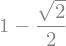

In [18]:
expr.subs([(x, 0), (y, sy.pi/4)])

If you really need a floating point number, you can use the evalf method

In [19]:
expr.evalf(subs={x: sy.pi/3, y:3})

### Algebra

There are functions for expanding, factoring, simplifying, collecting terms etc.

In [20]:
a = (x+3)*(x-2)
a.expand()

In [21]:
sy.simplify(sy.sin(x)**2 + sy.cos(x)**2)

**EXERCISE**: 
 * Try simplifying
$$
\frac{x^3 - 2x^2 -5x + 6}{x^2-4x+3}
$$
 * Use `.factor()` to factorize
$$
2x^4+x^3 - 33x^2 - 16x +16
$$

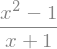

In [22]:
expr2 = (x**2-1) / (x+1)
expr2

In [23]:
expr2.cancel()

`simplify()` will miss some simplifications, but there is [extensive documentation](https://docs.sympy.org/latest/tutorial/simplification.html) on giving it a hand.

## Solving Simultaneous Equations

Sympy as a `solveset` routine which can help you simple equations. One gotcha with this is that you might expect to write an equation as e.g. `x**2 + 2x == -1`, but this will evaluate to False (try it). To get around this sympy as an `Eq` function for equality (an alternative is to rearrange things so that your equations are equal to zero (e.g `x**2 + 2*x - 1`)

In [24]:
sy.Eq(x**2 + 2*x, -1)

To use solveset, just pass it an equation and (optionally) the variable you want to solve for

In [25]:
sy.solveset(sy.Eq(x**2,-1), x)

So there are two solutions, $x=i$, & $x=-i$. By passing the `domain=` argument you can restrict solutions to a specific domain (e.g. $\mathbb{R}$ or $\mathbb{C}$)

For systems of linear equations there is linsolve which takes a list of equations and a tuple of the variables to solve for

In [26]:
sy.linsolve([sy.Eq(x + 3 * y, 1), sy.Eq(y, 3)], (x, y))

In [27]:
sy.solveset(sy.Eq(x**2,-1), x, domain=sy.Reals)

## Calculus

### Derivatives

sympy has lots of features for doing calculus. For simple differentiation sympy expressions have a `.diff()` method. You pass the variables you need to differentiate with respect to.

In [28]:
sy.cos(x).diff(x)

**TODO**: Try differentiating
$$
\frac{(1 + 2x^2)(x^3-x)^2}{\sqrt{x+5x^2}}
$$
Hint: You'll need `sy.sqrt()`

There is a Derivative object which will let you create a derivative but delay evaluating it (this is more useful that it sounds, sometimes you'll want to massage the resulting expressions a bit before evaluating).

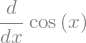

In [29]:
expr2 = sy.Derivative(sy.cos(x), x)
expr2

When you're ready you can `doit()`

In [30]:
expr2.doit()

### Integrals

Integrals are much harder to deal with systematically, but sympy does a pretty good job

In [31]:
sy.integrate(expr, x)

You can also evaluate definite integrals, `oo` is sympy's notation for $\infty$

In [32]:
sy.integrate(sy.exp(-x), (x, 0, 'oo'))

You can do multidimensional integrals with the same syntax we used to do multiple derrivatives. Similar to the `Derivative` object, we can delay the evaluation of the integral with the `Integral` object.

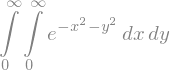

In [33]:
expr3 = sy.Integral(sy.exp(-x**2-y**2), (x, 0, 'oo'), (y, 0, 'oo'))
expr3

In [34]:
expr3.doit()

If sympy doesn't know how to evaluate an integral it will just return an `Integral` object which you can then work with to try to get it to evaluate, e.g. you can add assumptions on variable domains etc.

## Series

For numerical a fairly common pattern is to have some expression which you can't evaluate exactly, but which you can approximate with some finite number of terms. Function objects in sympy have a series method which will let you calculate a taylor series expansion of the function

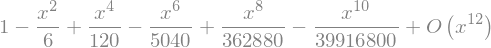

In [35]:
sxx = (sy.sin(x)/x).series(x, x0=0, n=12)
sxx

This is accurate up to $O(x^{12})$. You can extract individual terms you might need

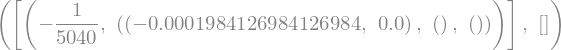

In [36]:
sxx.coeff(x**6).as_terms()

In [37]:
import sympy as sy
x = sy.symbols('x')
from ipywidgets import interact, interactive, fixed, interact_manual

from IPython.display import display, clear_output
from ipywidgets import widgets

def ftaylor(n):
    return (sy.sin(x)/x).series(x, x0=0, n=n)

fresult = interact(ftaylor, n=widgets.IntSlider(min=2,max=20,step=1,value=4));

interactive(children=(IntSlider(value=4, description='n', max=20, min=2), Output()), _dom_classes=('widget-int…

So, we do the same thing visually with matplotlib, looking at how good our series approximation is compared to the exact value

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)
import numpy as np

def taylorApprx(n):
    clear_output(wait=True)
    func = sy.sin(x)/x
    taylor = sy.series(func, n=n).removeO()
    
    evalfunc = sy.lambdify(x, func, modules=['numpy'])
    evaltaylor = sy.lambdify(x, taylor, modules=['numpy'])
    
    t = np.linspace(-5.5, 5.5, 100)
    fig, ax = plt.subplots(1, figsize=(16,10))
    ax.plot(t, evalfunc(t), 'b', label='sin(x)/x')
    ax.plot(t, evaltaylor(t), 'r', label='{0} order appx.'.format(n))
    ax.legend(loc='best')
    sy.latex(taylor)
    plt.show()
    return taylor

a=widgets.interactive(taylorApprx, n=widgets.IntSlider(min=3,max=20,step=1,value=4))
display(a)

interactive(children=(IntSlider(value=4, description='n', max=20, min=3), Output()), _dom_classes=('widget-int…

## Other examples

With a little bit more effort you can produce much richer interfaces. The example below is adapted from the [IPython Cookbook](https://ipython-books.github.io/).

In [1]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox

In [2]:
freq_slider = widgets.FloatSlider(
    value=2.,
    min=1.,
    max=10.0,
    step=0.1,
    description='Frequency:',
    readout_format='.1f',
)

In [3]:
range_slider = widgets.FloatRangeSlider(
    value=[-1., +1.],
    min=-5., max=+5., step=0.1,
    description='xlim:',
    readout_format='.1f',
)

In [4]:
grid_button = widgets.ToggleButton(
    value=False,
    description='Grid',
    icon='check'
)

In [5]:
button = widgets.Button(
    description='Plot',
)

In [6]:
color_buttons = widgets.ToggleButtons(
    options=['blue', 'red', 'green'],
    description='Color:',
)

In [7]:
title_textbox = widgets.Text(
    value='Hello World',
    description='Title:',
)

In [8]:
color_picker = widgets.ColorPicker(
    concise=True,
    description='Background color:',
    value='#efefef',
)

In [9]:
tab1 = VBox(children=[freq_slider,
                      range_slider,
                      ])
tab2 = VBox(children=[color_buttons,
                      HBox(children=[title_textbox,
                                     color_picker,
                                     grid_button]),
                                     ])

In [39]:
# To prevent automatic figure display when execution of the cell ends
%config InlineBackend.close_figures=False

from ipywidgets import widgets
from IPython.display import display,clear_output

plt.ioff()
ax=plt.gca()

out=widgets.Output()

tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'plot')
tab.set_title(1, 'styling')
vbox = VBox(children=[tab, button, out])

display(vbox)

def click(b):
    ax.clear()

    xlim = range_slider.value
    freq = freq_slider.value
    grid = grid_button.value
    color = color_buttons.value
    title = title_textbox
    bgcolor = color_picker.value
    
    ax.clear()
    
    t = np.linspace(xlim[0], xlim[1], 1000)
    ax.plot(t, np.sin(2 * np.pi * freq * t),
            color=color)
    ax.grid(grid)
    ax.set_title(title_textbox.value)
    ax.set_facecolor(color_picker.value)
    
    with out:
        clear_output(wait=True)
        display(ax.figure)

button.on_click(click)
click(None)